# Advanced(ish) Topics in Differential Equations

---

## Exercise

In [1]:
# import some stuff
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.io import loadmat

---
## 1. Frequency Spectrum

When recording electrophysiological data, the *local field potential* (LFP) is the raw voltage trace recorded in the extracellular space outside a recording electrode placed in the brain. A lot of information is contained in the LFP; one of the most commonly used are local, high-frequency spikes that correspond to an action potential of a nearby neuron. Additionally, there are low-frequency signals that lie in the LFP. These signals are generally thought to be an average of nearby *and* distant activity, which can act as a signal for some behavioral or mental state and/or a signal for inter-region synchronization/communication. 

One of these low-frequency signals has been well characterized in hippocampus: the theta frequency. Theta is a 6-10Hz frequency (in rodents) that dominates hippocampal LFP when the animal is alert or active (human theta is traditionally slower, ~2-6Hz; however, recent data suggest a distinct, higher frequency theta also exists in humans (Goyal et al. 2020)). There's many more cool things that have been linked to theta (and other cool frequency bands), but learning about that is for an adventure outside of this exercise. 

In this exercise, we'll be using FFTs to detect theta power in the LFP of a very polite rat, M137, who has graciously allowed us to use some data recorded while active in his homecage from one of his neuropixel 2.0 shanks centered around dorsal hippocampus. This data set contains 2 minutes of LFPs, downsampled to 1000Hz, recorded on each of 383 channels laid out vertically -- this is a nearly 3 mm vertical strip of LFPs recorded across visual cortex, dorsal hippocampus, and into a bit of thalamus. In the code below, you can feast your eyes on the first 5 seconds of LFP traces across all(!) 383(!) channels. The data are plotted in a vertical stack of LFP traces, where the higher traces are the dorsal channels, and the lower traces are the lower channels. 

The data set is too large to upload to GitHub (115MB), so you can download it from Google drive here: https://drive.google.com/file/d/1e7OXG2IHNHKF3kWnQYfIw7Bc2lW86s2U/view?usp=sharing


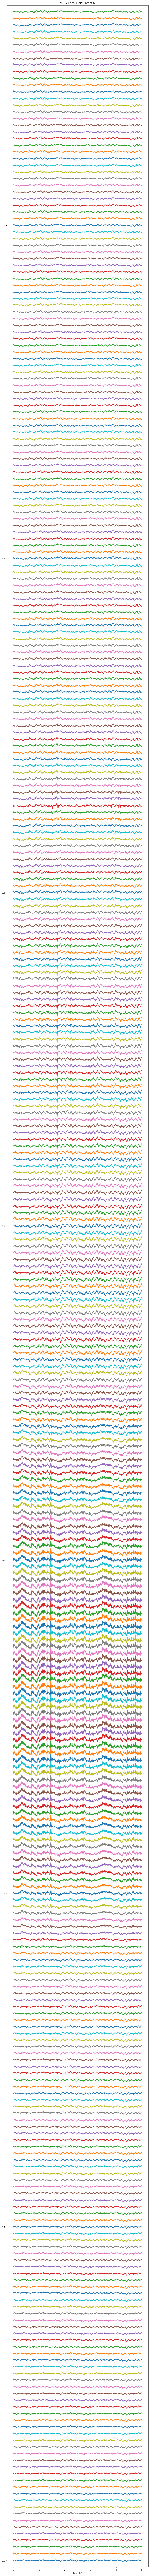

In [2]:
# get data
tmp = loadmat('M137_LFP_data.mat');
data = tmp['data']
Fs = 1000.0        # sampling rate
nchans = 383       # number of channels
N = data.shape[1]  # number of time points

# demean the data
data = data - data.mean(axis=1,keepdims=True)

# plot ALL THE CHANNELS
plt.figure(figsize=(11,200))
ts = np.arange(0,N)/Fs  # timestamps
# we're going to add a small offset to each of the LFP traces so that the channels stack on top of each other
plt.plot(ts[:5000],(data[:,:5000] + 2E-3*np.arange(0,nchans)[:,None]).T);
plt.ylim([-0.002,0.766]); # because there's extra whitespace for some reason without this
plt.title('M137 Local Field Potential');
plt.xlabel('time (s)');

Although M137 was only in his homecage, he was certainly alter and pacing around waiting for his daily dose of Yogies. Therefore, you may have been able to see the 6-10Hz theta signal riding on many of the traces, and you may have noticed that the amplitude of this signal got larger towards the middle. 

Hopefully your fingers aren't too tired from all scrolling, because next we want quantitatively look at theta power across each of these channel by computing a *spectral power density* from the output of an FFT. Fortunately, we won't have to code up an FFT from scratch, and instead enlist the help of `scipy.fft` to provide us with the necessary tools for this analysis. Using the output from this function, we can visualize the amplitude and power corresponding to each measured frequency. Recall that the amplitude of a DFT is the absolute value of its Fourier coefficient, namely:

$$ |c_n| = \frac{|\hat{f}_n|}{N}$$

where $\hat{f}_n$ is the output of the FFT at frequency $n$. Also, recall the following:

$$\frac{1}{N}\sum_{k=0}^{N-1}|\hat{f}_k|^2 $$

which can be interpreted as the total energy or *power* of the system. The power contribution of a single frequency, then, is

$$\text{power}_n = \frac{|\hat{f}_k|^2}{N} $$

Calculate the amplitude and power for all frequencies outputted by `scipy.fft`, and plot the amplitude and power spectra separately for an individual channel as well as separate heat maps for the amplitude and power spectra across all channels.

In [ ]:
# helpful functions
from scipy.fft import fft,fftfreq

# 1. Use fft() to get the fast fourier transform
# The output will give us the FFT computed over the range -Fs/2 to Fs/2
# This distribution is symmetrical, therefore we only want the first N/2 points


# 2. Compute the amplitude spectrum
# 2.1 The amplitude is the absolute value of our fft output, scaled by the number of samples

# 2.2 To adjust for the negative half of the distribution, we need to double the amplitude for each frequency
# However the 0th and N/2nd frequencies should NOT be doubled since they only occurs once


# 3. Compute the power spectrum
# 3.1 The power is the absolute value of our fft output squared, scaled by the number of samples
# We also need to divide by the sampling rate to be in units of power/frequency

# 3.2 Similar to the amplitude, we need to double the value of each positive frequency that occurs twice

# 3.3(optional) you can convert power to a measure of dB using the conversion 10*np.log10(power)


# 4. get the frequency range of interest
# 4.1 use fftfreq() to calculate the frequency values calculated by fft()
# Similarly, we only want the first N/2 frequencies

# 4.2 For better visibility, use np.where() with your frequency vector from 4.1 to define 
# indices for a zoomed in frequency window for plotting


# 5. Plotting
# 5.1 Plot the amplitude spectrum for a single channel of your choice

# 5.2 Using plt.pcolormesh, plot a heatmap of amplitude spectrums across all channels

# 5.3 Plot the power specral density for the same single channel

# 5.4 Using plt.pcolormesh, plot the power spectral density across all channels


Look at that theta! You may be able to visually identify the channel that lands in layer CA1 of the hippocampus, which is the most dorsal layer with the highest theta power. 

Another fun function to analyze spectral data is `scipy.signal.spectrogram`. Using this function, we can plot how the spectral power on a single channel changes over time. Pick a channel above with high theta power and plot its spectrogram below to see how much theta power changes over time.

In [ ]:
# helpful function
from scipy.signal import spectrogram

# 6. Using spectrogram(), plot the spectrogram for a single channel to see how the spectral power changes over time
# Similar to above, you may want to define a smaller frequency interval to zoom in your plot
